In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
import sys

Using TensorFlow backend.


In [2]:
train_dir = r"C:/Users/Hasan/Desktop/code/tutorial_deeplearning/clean-dataset/train" #r for raw string
validation_dir = r"C:/Users/Hasan/Desktop/code/tutorial_deeplearning/clean-dataset/validation"

train_num = 0 # count no. of training data
for r, d, files in os.walk(train_dir):
    train_num +=len(files)
    
validation_num = 0 # count no. of testing data
for r, d, files in os.walk(validation_dir):
    validation_num +=len(files)

In [3]:
# use ImageDataGenerator class to load images and
# flow_from_directory function to generate batches of images and labels

datagen = ImageDataGenerator(rescale = 1./255)
batchSize = 32 # 32 is a good starting point
inputSize = 30

train_generator = datagen.flow_from_directory(
    train_dir, 
    target_size = (inputSize,inputSize),  
    batch_size = batchSize,
    class_mode = 'categorical', 
    shuffle = True)

validation_generator = datagen.flow_from_directory(
    validation_dir, 
    target_size = (inputSize,inputSize), 
    batch_size = batchSize,
    class_mode = 'categorical', 
    shuffle = False)

Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [6]:
from smallconvnet import SmallCONVNet

model = SmallCONVNet.build(width=inputSize, height=inputSize, depth=3,
                           classes=3)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
from keras import optimizers

# Compile the network
print("[INFO] training network...")
opt = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)


[INFO] training network...
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
19/18 [==============================] - 10s 504ms/step - loss: 2.2129 - acc: 0.3010 - val_loss: 1.2600 - val_acc: 0.3600
Epoch 2/20
19/18 [==============================] - 5s 268ms/step - loss: 1.6465 - acc: 0.4019 - val_loss: 1.0773 - val_acc: 0.5467
Epoch 3/20
19/18 [==============================] - 5s 286ms/step - loss: 1.3136 - acc: 0.5016 - val_loss: 0.9798 - val_acc: 0.5533
Epoch 4/20
19/18 [==============================] - 5s 271ms/step - loss: 1.3307 - acc: 0.5219 - val_loss: 0.8616 - val_acc: 0.6133
Epoch 5/20
19/18 [==============================] - 6s 298ms/step - loss: 1.3043 - acc: 0.5416 - val_loss: 0.7170 - val_acc: 0.6667
Epoch 6/20
19/18 [==============================] - 5s 280ms/step - loss: 1.2244 - acc: 0.5783 - val_loss: 0.7371 - val_acc: 0.6667
Epoch 7/20
19/18 [==============================] - 5s 268ms/step - loss: 1.1198 - acc: 0.6053 - val_loss: 0.7477 - val_acc: 0.6933


In [34]:
# predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
# predicted_classes = np.argmax(predictions,axis=1)

test_loss,test_acc = model.evaluate_generator(validation_generator, 
                                              steps=validation_generator.samples/validation_generator.batch_size)

print('\ntesting loss: {}, testing acc: {}\n'.format(test_loss, test_acc))


testing loss: 0.5304156637191773, testing acc: 0.7933333373069763



Text(0.5, 1.0, 'Accuracy Curves')

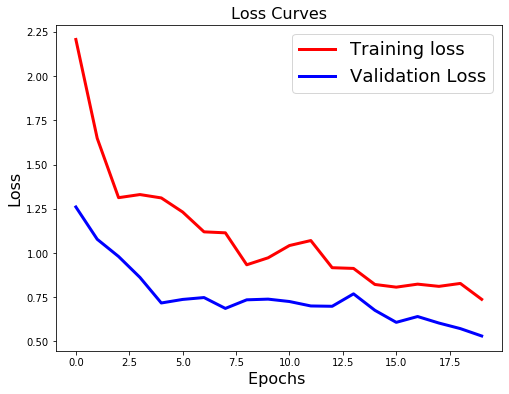

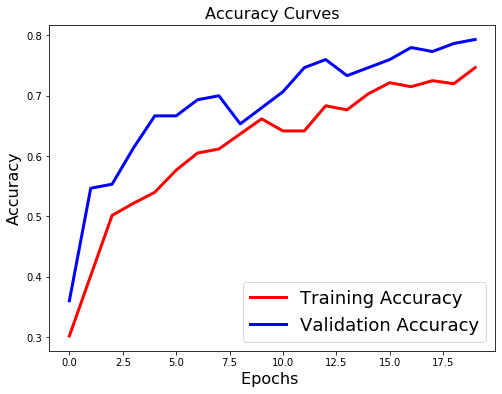

In [35]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

# Get the ground truth from generator
ground_truth = validation_generator.classes

#Confusion Matrix and Classification Report
conf_mat = confusion_matrix(ground_truth, predicted_classes)
print('Classification Report')
target_names = ['pumpkin', 'watermelon', 'tomato']
print(classification_report(validation_generator.classes, predicted_classes, target_names=target_names))
plt.figure()
plot_confusion_matrix(conf_mat, classes=target_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [ ]:
model.save('fullyConnected_owndata.h5')
new_model = tf.keras.models.load_model('fullyConnected_owndata.h5')

In [ ]:
import cv2
# from PIL import Image
video = cv2.VideoCapture(0)

while True:

    __,frame = video.read()
       
#     im = cv2.resize(frame,(30,30))
#     im = im.reshape(30*30*3)
#     im = tf.keras.utils.normalize(im)
# #     img_array = np.array(im)
#     predictions = new_model.predict(im)
#     label = np.argmax(predictions)
    
#     if label == 0: 
#          label = 'pumpkin'
#     elif label == 1: 
#          label = 'tomato'
#     elif label == 2: 
#          label = 'watermelon'
#     # Display the predictions
#     cv2.putText(frame, "Label: {}".format(label), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
#     cv2.imshow("Classification", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
          break

video.release()
cv2.destroyAllWindows() 